In [1]:
#LIBRARIES
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
import math 
## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pylab as P

In [2]:
DF_JOB_H = pd.read_excel("final_DB_extended.xlsx")


In [3]:
DF_JOB_H["job_history_clean"]
def isNaN(testS):
    return not type(testS) == str and  math.isnan(testS)==True
def convertInt(stringIn):
    try:
        return int(stringIn)
    except ValueError:
        print("error int", stringIn)
        return 2021

In [4]:
from deep_translator import GoogleTranslator
def translateString(to_translate, languageFinal):
    valid =isNaN(to_translate)
    #print(valid)
    try:
        translated = GoogleTranslator(source='auto', target=languageFinal).translate("no" if valid else to_translate)
        return translated
    except : 
        print(to_translate)
        return "no"
nlp = spacy.load("en_core_web_sm")

def cleaning(text):
    ##text = text.lower()
    #text = text.replace('[>/,\.!?\-!?\n\)\(\r]', ' ') 
    text = re.sub("[^A-Za-z']+", ' ', str(text))
    doc = nlp(text)
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    #txt = [token.lemma_ for token in doc if not token.is_stop]
    txt = [tok.lemma_.lower() for tok in doc
                if not tok.is_stop and not tok.is_punct and tok.is_alpha ]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    return txt

In [5]:
isNaN("10")

False

In [29]:
## object maker
def stringToObject(DataFrame):
    #SEPARANDO LOS STRINGS DE CADA TRABAJO

    L = []

    for i in DataFrame.job_history_after:
        l = str(i).split("},") #convertir en string el job history del individuo y crear lista para separar cada formación
        k = [] #Lista donde se almacenara cada formación x del individuo i
        for job in l: #para cada trabajo
            job = job.replace("[", "").replace("]", "") + "}" #separelos y conviertalas en diccionarios
            k.append(job) #añadalas a la lista de jobs
        L.append(k) 
    #EXTRAER DE MANERA ORDENADA EL JOB HISTORY, LA FECHA DE TERMINACIÓN Y COMIENZO
    K = [] 
    index = 0
    for individuo in tqdm(L): 

        educacion_ind = [] 

        for ins in individuo: 
            #print(ins, type(ins))
            ins = ins.replace('"', "'")

            c = {}

            #EXTRAER JOB-TITLE
            if ( len(re.findall("'job_title': '.*?'", ins)) ) > 0:
                c["job_title"] =  re.findall("'job_title': '.*?'", ins)[0].replace("'job_title': ", "").replace("'", "")
                c["job_title"] = str(c["job_title"])
                # c["job_title"] = cleaning(c["job_title"])

            #EXTRAER INICIO
            if ( len(re.findall("'start': '.*?'", ins)) ) > 0:
                c["start"] = re.findall("'start': '.*?'", ins)[0].replace("'start': ", "").replace("'", "")
                c["start"] = convertInt(c["start"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO 

            #EXTRAER FINALIZACIÓN
            if ( len(re.findall("'end': '.*?'", ins)) ) > 0:
                c["end"] = re.findall("'end': '.*?'", ins)[0].replace("'end': ", "").replace("'", "")
                c["end"] = convertInt(c["end"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO
            if index < 20:
                print(ins,c)
            educacion_ind.append(c) #añado cada formación a la lista de sus educaciones
        job_current = {'job_title': DataFrame["job_title"][index]}
        #print(job_current)
        educacion_ind.append(job_current)

        K.append(educacion_ind) #añado la educación de cada individuo a una lista general
        index += 1 
    return K

    

In [30]:
result = stringToObject(DF_JOB_H)
print(result[0])


100%|██████████| 1004/1004 [00:00<00:00, 25880.26it/s]{'job_title': 'programming coordinator', 'start': '2016'} {'job_title': 'programming coordinator', 'start': 2016}
 {'job_title': 'web developer', 'start': '2016'} {'job_title': 'web developer', 'start': 2016}
 {'job_title': 'web developer', 'start': '2016', 'end': '2016'}} {'job_title': 'web developer', 'start': 2016, 'end': 2016}
{'job_title': 'teacher assistant', 'start': '2016'}} {'job_title': 'teacher assistant', 'start': 2016}
} {}
{'job_title': 'account manager', 'start': '2014', 'end': '2015'}} {'job_title': 'account manager', 'start': 2014, 'end': 2015}
} {}
} {}
{'job_title': 'ad operations manager media manager', 'start': '2016'} {'job_title': 'ad operations manager media manager', 'start': 2016}
 {'job_title': 'web developer', 'start': '2015', 'end': '2016'}} {'job_title': 'web developer', 'start': 2015, 'end': 2016}
{'job_title': 'fundraising team', 'start': '2014', 'end': '2015'}} {'job_title': 'fundraising team', 'star

In [43]:
result[10]

[{'job_title': 'graphic design', 'start': 2015},
 {'job_title': 'head of customer service', 'start': 2011, 'end': 2015},
 {'job_title': 'Diseñadora gráfica'}]

In [31]:
len(result)

1004

In [10]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

        

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [11]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


In [12]:
DF_JOB_H["end_boot"][200]

2017

In [13]:
np.add.reduce([np.zeros(3)])

array([0., 0., 0.])

In [32]:
## tranform profiles to vectors
profilesVectors = []
profilesVectorPlain = []
for index in range(0,len(result)):
    job_history_prof = result[index]
    boot_year = DF_JOB_H["end_boot"][index]
    boot_year = int(boot_year) if not type(boot_year) ==str  and not math.isnan(boot_year)  else float("nan")
    total_jobs = len(job_history_prof)
    job_vectors = []
    print(index)
    for i in range(0,total_jobs):
        if "start" in job_history_prof[i] and "job_title" in job_history_prof[i] and boot_year and not math.isnan(boot_year):
            job_title = job_history_prof[i]["job_title"]
            job_title_en = translateString(job_title,"en")
            cleaned = cleaning(job_title_en)
            print(job_title_en, len(job_title))
            nVectors = [np.zeros(DIMENTION_DIC)]
            if len(cleaned) > 0:
                nVectors  = [ getVectorWord(embeddings_dict,word) for word in cleaned]
            sumVector = np.add.reduce(nVectors)
            job_vectors.append(sumVector)
            profilesVectorPlain.append(sumVector)
        # for current job, decoment if case
        #elif (not "start" in job_history_prof[i] and "job_title" in job_history_prof[i] and  type(job_history_prof[i]["job_title"]) ==str):
        #    job_title = job_history_prof[i]["job_title"]
        #    job_title_en = translateString(job_title,"en")
        #    cleaned = cleaning(job_title_en)
        #    #print(cleaned, len(cleaned))
        #    nVectors = [np.zeros(DIMENTION_DIC)]
        #    if len(cleaned) > 0:
        #        nVectors  = [ getVectorWord(embeddings_dict,word) for word in cleaned]
        #    sumVector = np.add.reduce(nVectors)
        #    #print( len(sumVector))
        #    job_vectors.append(sumVector)
        #    profilesVectorPlain.append(sumVector)
        else:
            profilesVectorPlain.append(np.zeros(DIMENTION_DIC))
            job_vectors.append(None)
    profilesVectors.append(job_vectors)



 organizational design, capacity 72
453
454
455
president 9
vice president external affairs 31
456
business intelligence financial analyst 39
457
managing director | chief data officer 38
data &amp; analytics director 29
458
data analyst 12
digital analyst sr. 20
digital analyst sr 18
programmatic marketing assistant 32
459
marketing coordinator 25
marketing analyst 21
460
finance and analytics 21
461
latam public relations manager 30
462
sales engineer 14
463
ssr business intelligence analyst 33
464
465
466
467
data scientist 14
member board of directors &amp; ict subcommittee lead 53
468
469
470
471
472
hr bussines partner 19
473
474
475
data scientist 14
econometric technical expert 28
476
477
head of marketing and communication 32
478
prospect marketing - data analyst 33
479
480
481
482
digital channel analyst 29
483
head of data driven business 28
head of data science &amp; machine learning 43
484
its-qs specialist 17
integrating project 19
485
credit risk analyst 30
486
487
488
4

In [33]:
len(profilesVectorPlain)

2572

In [34]:
## number of words needed to pass
MIN_COUNT = 3
## validates if is word related
def validator(relatedWords, words):
    isRelated = False
    count = 0
    for word in words:
        if word in relatedWords:
            count+=1
        if count >= MIN_COUNT: 
            return True
    if count >= MIN_COUNT: 
        return True
    else:
        return False

 


In [35]:
print(result[0],find_closest_embeddings(profilesVectorPlain[0])[:9])

[{'job_title': 'programming coordinator', 'start': 2016}, {'job_title': 'web developer', 'start': 2016}, {'job_title': 'web developer', 'start': 2016, 'end': 2016}, {'job_title': 'Analista Programador'}] ['programming', 'coordinator', 'program', 'programs', 'assistant', 'development', 'manager', 'director', 'project']


In [36]:
newVector = []
index = 0
for vec in profilesVectorPlain:
    print(index)
    try:
        lenght = len(vec)
        newVector.append(vec)
        #print(index, len(vec), len(newVector))
    except:
        newVector.append(np.zeros(DIMENTION_DIC))
        print(vec)
    index +=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
TOTAL_CLUSTERS = 12
#TOTAL_CLUSTERS = 4
dicC = {}
clusterTotal = np.zeros(len(newVector))

related_words = ["software","development","engineer","web","developers","developer","engineering","technical","java","computer","microsoft","technology","programmer"]
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(newVector)
    labels = kmeans.labels_
    relatedArray = []
    for index in range(0,len(kmeans.cluster_centers_)):
        words = find_closest_embeddings(kmeans.cluster_centers_[index])[:12]
        related = validator(related_words, words)
        print(index,related," - ",words)
        relatedArray.append(related)
    print(len(relatedArray),clust, len(clusterTotal))
    for proIndex in range(0,len(labels)):
        label = labels[proIndex]
        isRelated = relatedArray[label]
        if isRelated==True:
            print("isRelated")
            prev = clusterTotal[proIndex]
            clusterTotal[proIndex] = prev + 1
            print(prev,clusterTotal[proIndex])
    print("------------------------------------------\n")


isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
2.0 3.0
isRelated
2.0 3.0
isRelated
2.0 3.0
isRelated
7.0 8.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
3.0 4.0
isRelated
2.0 3.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
2.0 3.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
2.0 3.0
isRelated
8.0 9.0
isRelated
3.0 4.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
6.0 7.0
isRelated
6.0 7.0
isRelated
1.0 2.0
isRelated
8.0 9.0
isRelated
5.0 6.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
7.0 8.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated
8.0 9.0
isRelated

## max number in any job is 9, 

In [38]:
print(np.max(clusterTotal))

11.0


## after distribution, almost all related jobs

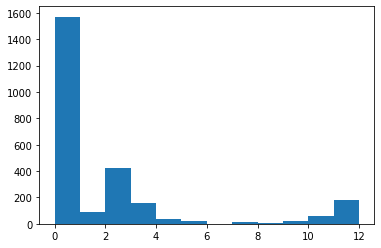

In [39]:
n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()

## before distribution, almost no related jobs

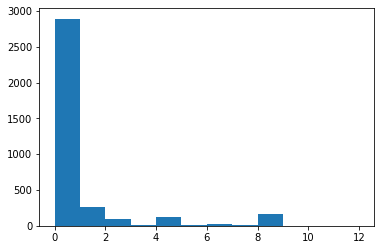

In [20]:

n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()

In [ ]:
len(clusterTotal)

In [ ]:
len(profilesVectors[0])

## to group back the data


In [40]:
totalIndex = 0
finalDic = {}
finalDic["HAD_RELATED_AFTER"] = []
finalDic["POSITIVE_JOBS_AFTER"] = []
finalDic["POSIBLE_JOBS_AFTER"] = []
finalDic["TOTAL_JOBS_AFTER"] = []
for profile in profilesVectors:
    lenP = len(profile)
    #totalIndex == 0 if print("total JOBs", profile) else totalIndex
    totalPosJobs = 0
    possibleJobs = 0
    hadRealted = False
    ## se recorre el array de jobs para este perfil
    for jobI in range(0,lenP):
        job = profile[jobI]
        print(jobI,type(job) )
        if  type(job) == np.ndarray : 
            countSingleJob = clusterTotal[totalIndex]
            print(countSingleJob)
            possibleJobs+=1
            if countSingleJob>6:
                hadRealted = True
                totalPosJobs+=1
            totalIndex+=1
        else:
            totalIndex+=1
    finalDic["HAD_RELATED_AFTER"].append(hadRealted)
    finalDic["POSITIVE_JOBS_AFTER"].append(totalPosJobs)
    finalDic["POSIBLE_JOBS_AFTER"].append(possibleJobs)
    finalDic["TOTAL_JOBS_AFTER"].append(possibleJobs)

print(len(clusterTotal),totalIndex,finalDic)


s 'numpy.ndarray'>
11.0
1 <class 'numpy.ndarray'>
11.0
2 <class 'numpy.ndarray'>
11.0
3 <class 'numpy.ndarray'>
3.0
4 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'numpy.ndarray'>
2.0
2 <class 'numpy.ndarray'>
4.0
3 <class 'numpy.ndarray'>
1.0
4 <class 'NoneType'>
0 <class 'numpy.ndarray'>
2.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
2.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'numpy.ndarray'>
2.0
2 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'numpy.ndarray'>
11.0
2 <class 'numpy.ndarray'>
3.0
3 <class 'NoneType'>
0 <class 'numpy.ndarray'>
8.0
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'numpy.ndarray'>
2.0
2 <class 'numpy.ndarray'>
11.0
3 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
2.0
1 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1

In [41]:

JOB_HIST_CLUS_DF = pd.DataFrame(finalDic)
JOB_HIST_CLUS_DF.to_excel("count_history_index_after.xlsx",index=False)
print(JOB_HIST_CLUS_DF, JOB_HIST_CLUS_DF.shape)

      HAD_RELATED_AFTER  POSITIVE_JOBS_AFTER  POSIBLE_JOBS_AFTER  \
0                  True                    2                   3   
1                 False                    0                   1   
2                 False                    0                   0   
3                 False                    0                   1   
4                 False                    0                   0   
...                 ...                  ...                 ...   
999               False                    0                   5   
1000               True                    4                   4   
1001              False                    0                   1   
1002               True                    1                   2   
1003              False                    0                   2   

      TOTAL_JOBS_AFTER  
0                    3  
1                    1  
2                    0  
3                    1  
4                    0  
...                ...  
999     